# Celebrity Face Recognition using OpenCV and Machine Learning
### In this Python code snippet, we will walk through the process of building a celebrity face recognition system using OpenCV (Open Source Computer Vision Library) and machine learning. The goal of this project is to detect and recognize faces of celebrities in images.

#### Prerequisites
Before we dive into the code, make sure you have the necessary libraries installed. You can install the required libraries using pip:


#### Overview

- Importing Libraries and Loading an Image: We start by importing the necessary libraries, including OpenCV, and load an image of a celebrity.

- Face Detection using Haar Cascade: We use Haar Cascade classifiers to detect faces and eyes in the image. Haar Cascade is an efficient object detection algorithm.

- Creating a Cropped Image: We create a cropped image containing the detected face. This cropped image is the region of interest (ROI) for our recognition process.

- Feature Engineering with Wavelet Transform: We apply a wavelet transform to the cropped image to enhance its features. This transformation helps in distinguishing facial features such as eyes, nose, and lips.

- Model Training: We prepare the dataset for training our machine learning model. We use both the raw and wavelet-transformed images as features. The model we use is a Support Vector Machine (SVM).

- GridSearchCV for Model Selection: We explore different machine learning models and hyperparameters using GridSearchCV to find the best-performing model.

- Saving the Model: We save the trained model and a class dictionary that maps class labels to celebrity names.

- Creating a GUI for Image Upload: We use Tkinter to build a graphical user interface (GUI) that allows users to upload an image for celebrity recognition.

- Image Preprocessing and Prediction: When a user uploads an image, we preprocess it, detect faces, apply feature engineering, and use our trained model to predict the celebrity.

This code provides a foundation for building a celebrity face recognition system. You can extend it to recognize a wide range of celebrities and use it for various applications, such as security systems or entertainment platforms.

## Importing Libraries and open cv for classification

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [2]:
# loading image using open cv
img=cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

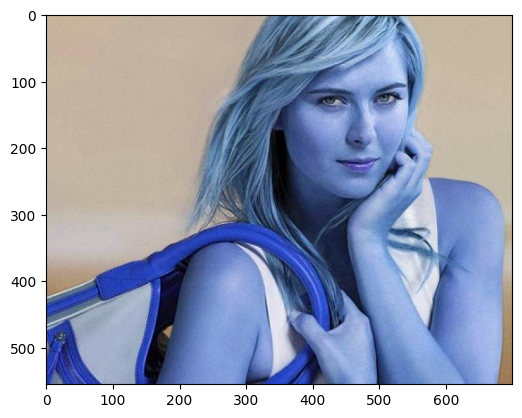

In [3]:
plt.imshow(img)

In [4]:
# grey image
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

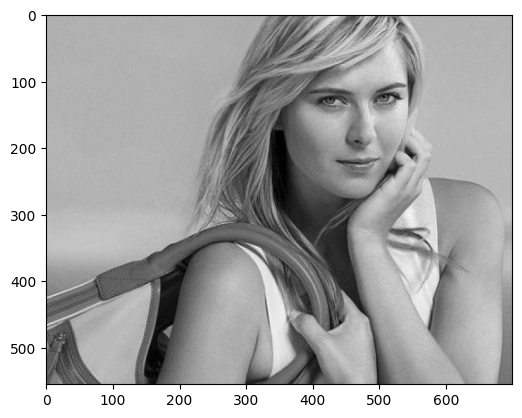

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:
# Haar cascade used to detect features of a face

<a href="https://docs.opencv.org/3.4/d2/d99/tutorial_js_face_detection.html">Open CV Tutorial</a>

## Face detection

#### Haar Cascade: Haar cascade is an algorithm that can detect objects in images, irrespective of their scale in image and location. This algorithm is not so complex and can run in real-time. We can train a haar-cascade detector to detect various objects like cars, bikes, buildings, fruits, etc Here we are detecting eyes using haar cascade

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
# gives x, y width and height values

array([[352,  38, 233, 233]])

In [8]:
#lets draw the coordinates
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

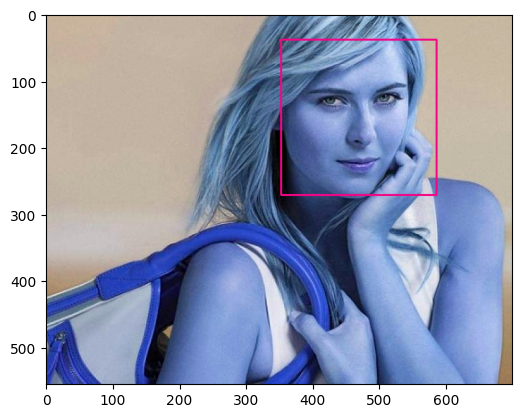

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(245, 5, 133),2)
plt.imshow(face_img)
# rgb=250, 120, 226
# x,y, (x+w,y+h)  is dimension

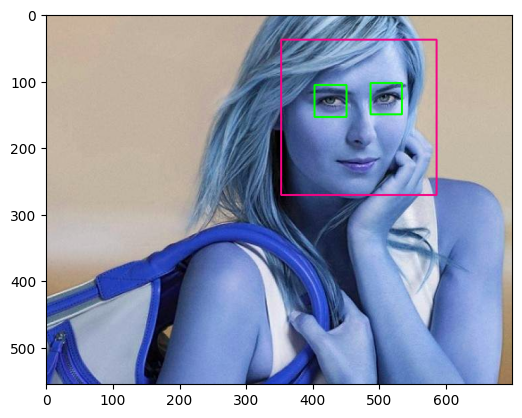

In [10]:
# closses all the open cv windows currently open
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    # defining the rectangular box
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(245, 5, 133),2)
    roi_gray = gray[y:y+h, x:x+w]
    # rectangle region for the face
    roi_color = face_img[y:y+h, x:x+w]
    # eye cascade will give eyes
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

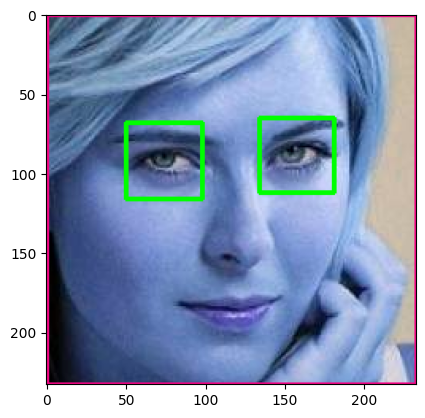

In [11]:
# region of interest
plt.imshow(roi_color)

In [12]:
# creating a function giving cropped images , i.e region of interest
# cropped imae with 2 eyes
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

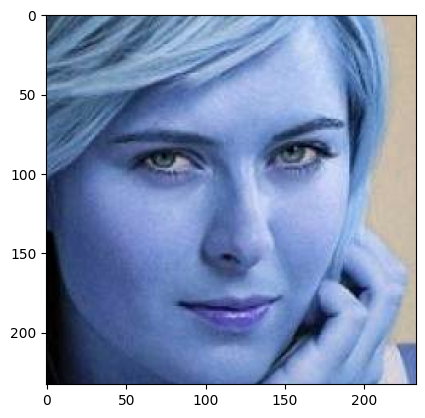

In [13]:
cropped_image=get_cropped_image('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

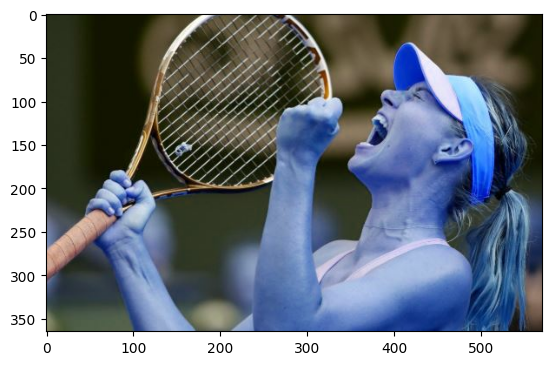

In [14]:
# if 2 eyes not clearly visible then not cropped
org_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)


## Creating crop folder and saving all datas of images for each celebrity

In [15]:
# nothing printed s not visible properly
cropped_image2=get_cropped_image('./test_images/sharapova2.jpg')
cropped_image2

In [16]:
# storing in a folder
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [17]:
# store the path of individual sub folders in python list.. os will go through all the subdirectories within my dataset folder.
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [19]:
# creating cropped folder
import shutil
if os.path.exists(path_to_cr_data):
    # if folder exists then remove for the directory
     shutil.rmtree(path_to_cr_data)
# else make directory
os.mkdir(path_to_cr_data)

THIS code is used to create cropped folder thus and croppng image so not running always.. needs to be runned for frst time

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] # spitting the path by / getting name
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path) #get the path of each image and pass
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder): # if folder not found then create one
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png" # generating name of the file
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path) # path dictionary
            count += 1
    

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


## Feature Engineering

#### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc. A wavelet transform (WT) is the decomposition of a signal into a set of basis functions consisting of contractions, expansions, and translations of a mother function ψ(t), called the wavelet

### Wavelet transform

In [21]:
# helps in determining 
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [22]:
# this transformation will help to provide colors black and white so that it helps to define colors easily 

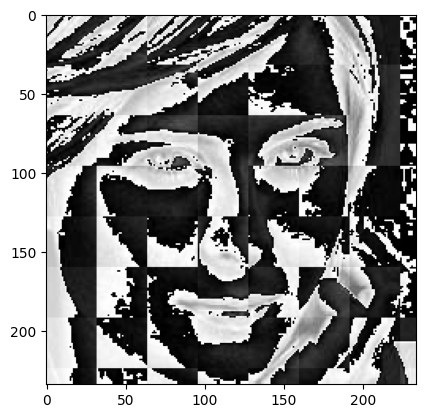

In [23]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [24]:
# checking the folders

In [25]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [26]:
#checking the path

In [27]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

In [28]:
# Defining x and y for training traning usining wavelet transform

In [29]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

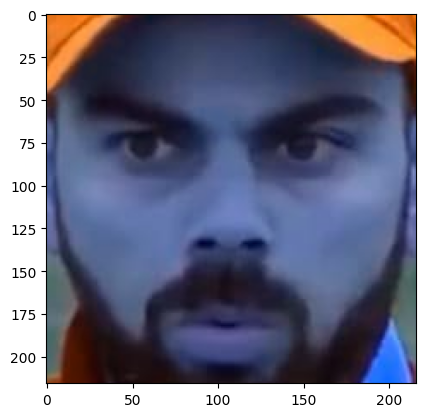

In [30]:
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        plt.imshow(cv2.imread(training_image))

In [31]:
#SIZE OF EACH IMAGE =32*32*3+ 32*32....first for image RBG second for wavelength transform 
len(X[0])


4096

In [32]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(186, 4096)

## Modelling

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [34]:
# creating sklearn pipeline to scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7872340425531915

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.71      0.71      0.71         7
           2       0.67      0.67      0.67         6
           3       1.00      0.70      0.82        10
           4       0.81      0.93      0.87        14

    accuracy                           0.79        47
   macro avg       0.78      0.76      0.77        47
weighted avg       0.80      0.79      0.79        47



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.755291,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.647619,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.776984,{'logisticregression__C': 1}


#### svm highest score

In [39]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [40]:
# score on test set
best_estimators['svm'].score(X_test,y_test)

0.7872340425531915

In [41]:
# score on test set
best_estimators['random_forest'].score(X_test,y_test)

0.6170212765957447

In [42]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7872340425531915

## SVM model used

In [43]:
#using svm as cross fold validation as well as on test it has good acuracy

In [44]:
best_clf=best_estimators['svm']

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  0,  2],
       [ 1,  5,  1,  0,  0],
       [ 1,  1,  4,  0,  0],
       [ 1,  0,  1,  7,  1],
       [ 0,  1,  0,  0, 13]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

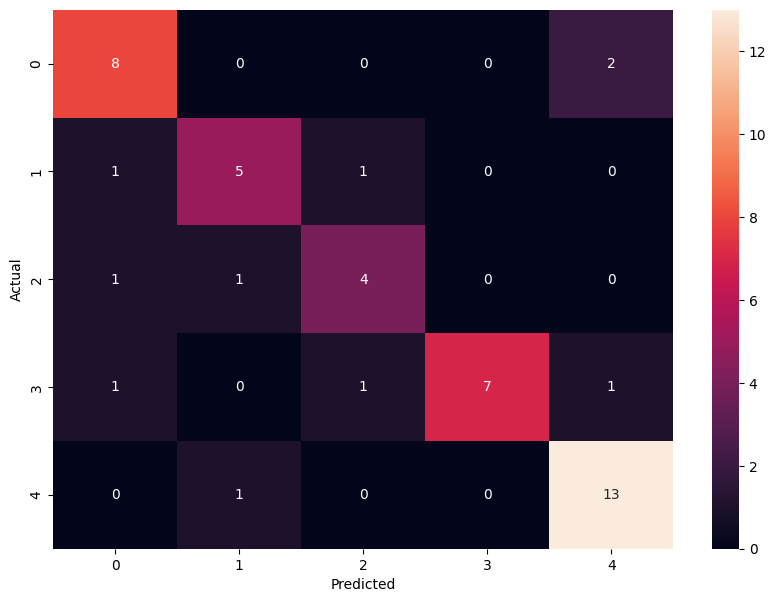

In [46]:
# 8 time lionel massy was correctly predicted and 2 times wrongly predicted as kohli
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show

In [47]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

## JOBLIB TO SAVE

In [48]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [49]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

## Using Tkinter to build a GUI for uploading image and testing them

In [50]:
#pip install tk

In [51]:
model=joblib.load('saved_model.pkl')
with open("class_dictionary.json","r") as f:
    class_dict=json.load(f)

In [82]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import io

# Create a tkinter window
root = tk.Tk()
root.title("Image Uploader")

# Variable to store the uploaded image
uploaded_image = None

# Function to open a file dialog for image selection and store it
def open_image():
    global uploaded_image
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png *.gif *.bmp")])
    if file_path:
        # Open the image using PIL
        image = Image.open(file_path)
        
        # Resize the image if it's too large to fit the UI
        max_width = 400
        max_height = 400
        if image.width > max_width or image.height > max_height:
            image.thumbnail((max_width, max_height))
        
        # Convert the PIL image to a format that tkinter can use
        tk_image = ImageTk.PhotoImage(image)
        
        # Store the uploaded image
        uploaded_image = np.array(image)
        
        # Create a tkinter Label to display the image
        image_label.config(image=tk_image)
        image_label.image = tk_image  # Keep a reference to prevent it from being garbage collected

# Create a label for the title
title_label = tk.Label(root, text="Image Uploader", font=("Helvetica", 20))
title_label.pack(pady=20)

# Create a button with better styling
upload_button = tk.Button(root, text="Upload Image", command=open_image, padx=20, pady=10, bg="#4CAF50", fg="white", font=("Helvetica", 14))
upload_button.pack(pady=20)

# Create a label to display the image
image_label = tk.Label(root)
image_label.pack()

def exit_application():
    root.destroy()  # Close the main window

# Create an "Exit" button
exit_button = tk.Button(root, text="Save", command=exit_application,padx=20, pady=10, bg="#4CAF50", fg="white", font=("Helvetica", 14))
exit_button.pack()

# Run the tkinter main loop
root.mainloop()


In [83]:
# uploaded_image

### here as the cropped image is required for model so we call the function but as the function previously was taking path for image we call the same function with other name nd provide uploaded image as parameter then scale it 

In [84]:
def get_cropped(image_path):
    gray = cv2.cvtColor(image_path, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image_path[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # Check if there are at least 2 eyes for a valid face
        if len(eyes) >= 2:
            return roi_color
    
    # If no face is detected, return a message
    return "Face not detected"



In [85]:
# Example usage:
image = get_cropped(uploaded_image)

if isinstance(image, str):
    print(image)
else:
    cv2.imshow("Cropped Face", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### then we are scalling and stack the image

In [86]:
scalled_raw_img=cv2.resize(image,(32,32))
img_har=w2d(image,'db1',5)
scalled_img_har=cv2.resize(img_har,(32,32))
combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))

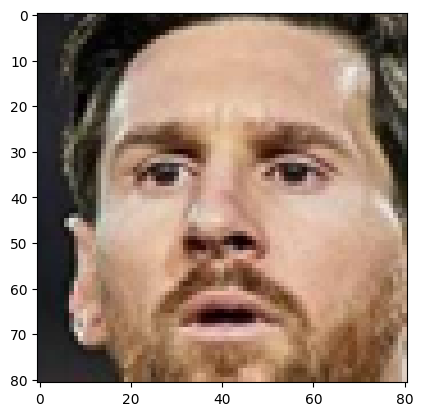

In [87]:
plt.imshow(image)

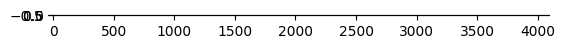

In [88]:
plt.imshow(combined_img.T)

### predicting the uploaded image

In [89]:
# transposing the image array for predicting

In [90]:
pred=model.predict(combined_img.T)

In [91]:
person= [key for key, value in class_dict.items() if value == pred]
print(f"Predicted sports person: {person[0]} ")

Predicted sports person: lionel_messi 
